# Data Visualization - Ford GoBike System Data

by Laman Mammadli

27/07/2021

# Content

[Data set Overview](#overview)

[Questions](#questions)

[Explanatory Analysis](#explanatory)

[Call to Action](#call)

<a id='overview'></a>
### Data set Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  

<a id='questions'></a>
### Questions 


- When are most trips taken in terms of time of day, day of the week?
- Does the average trip depend on if a user is a subscriber or customer?
- Does the average trip depend on if a user is a male or female?
- When the ride duration is the highest? 
- Is there a relationship between the age of riders and the duration of the rides and distance? 

In [1]:
# Importing crucial libraries 

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
bike_df = pd.read_csv('biketrip_data_edited.csv')
bike_df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,...,member_gender,bike_share_for_all_trip,week_days,years,months,hours,period_of_day,duration_min,distance_km,age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,...,Male,No,Thu,2019,Feb,17,afternoon,869,0.36,35
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,Male,No,Thu,2019,Feb,12,afternoon,1030,2.64,47
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,...,Other,No,Thu,2019,Feb,17,afternoon,608,0.27,30
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,...,Male,Yes,Thu,2019,Feb,23,night,26,2.65,45
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,...,Male,No,Thu,2019,Feb,23,night,29,2.32,60


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               174952 non-null  int64  
 1   duration_sec             174952 non-null  int64  
 2   start_time               174952 non-null  object 
 3   end_time                 174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_name         174952 non-null  object 
 8   end_station_latitude     174952 non-null  float64
 9   end_station_longitude    174952 non-null  float64
 10  bike_id                  174952 non-null  int64  
 11  user_type                174952 non-null  object 
 12  member_birth_year        174952 non-null  int64  
 13  member_gender            174952 non-null  object 
 14  bike

In [6]:
# Converting to the datetime64

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               174952 non-null  int64         
 1   duration_sec             174952 non-null  int64         
 2   start_time               174952 non-null  datetime64[ns]
 3   end_time                 174952 non-null  datetime64[ns]
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  object        
 12  member_birth_yea

In [8]:
bike_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,week_days,years,months,hours,period_of_day,duration_min,distance_km,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,Male,No,Thu,2019,Feb,17,afternoon,869,0.36,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,Male,No,Thu,2019,Feb,12,afternoon,1030,2.64,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,Other,No,Thu,2019,Feb,17,afternoon,608,0.27,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Male,Yes,Thu,2019,Feb,23,night,26,2.65,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,Male,No,Thu,2019,Feb,23,night,29,2.32,60


<a id='explanatory'></a>
### Explanatory Analysis 

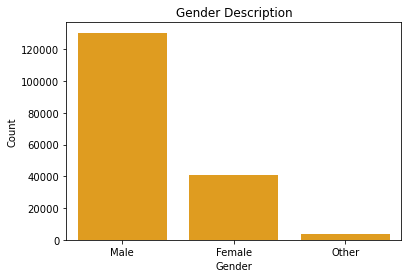

In [10]:
# Viewing gender count
# Static-ordering the bars
sb.countplot(data = bike_df, x = 'member_gender', color = 'orange', order=[1, 3, 2]);

# Dynamic-ordering the bars
# Returning a Series
freq = bike_df['member_gender'].value_counts()

# Getting the indexes of the Series
gen_order = freq.index

# Plotting the bar chart in the decreasing order of the frequency of the `member_gender`
sb.countplot(data = bike_df, x ='member_gender', color = 'orange', order = gen_order);

# Labeling the axes and title 
plt.title('Gender Description')
plt.xlabel('Gender')
plt.ylabel('Count')

# Displaying the plot
plt.show()


**Observation:**

**Male riders are more than female riders**

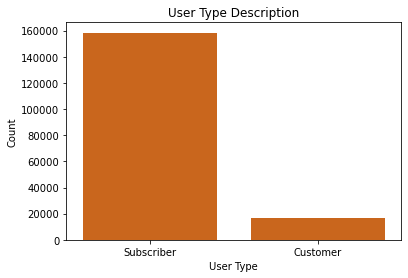

In [11]:
# Viewing user type count
# Dynamic-ordering the bars
# Returning a Series
freq = bike_df['user_type'].value_counts()

# Getting the indexes of the Series
user_order = freq.index

sb.countplot(data = bike_df, x = 'user_type', color = '#E66100', order = user_order)

# Labeling the axes and title 
plt.title('User Type Description')
plt.xlabel('User Type')
plt.ylabel('Count')

# Displaying the plot
plt.show()

**Observation:**

**Subscriber riders are more than customer riders**

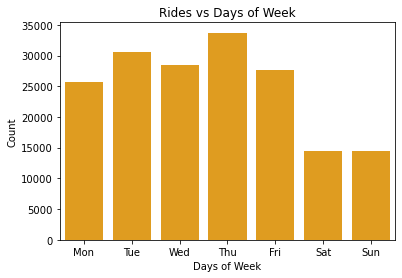

<Figure size 432x216 with 0 Axes>

In [12]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Viewing rides during the week days 
sb.countplot(data = bike_df, x = 'week_days', color = 'orange', order = order)

# Labeling the axes and title 
plt.title('Rides vs Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Count')
plt.figure(figsize = (6, 3))

# Display the plot
plt.show()

**Observation:**

**Riders are more active on Tuesday, and less active on weekends.**

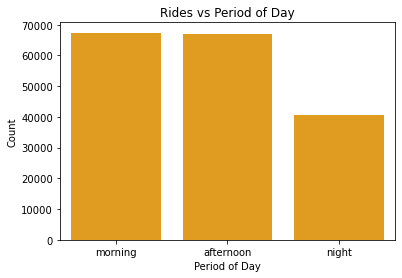

<Figure size 432x216 with 0 Axes>

In [13]:
order = ['morning', 'afternoon', 'night']

# Viewing the rides during a day
sb.countplot(data = bike_df, x = 'period_of_day', color = 'orange', order = order)

# Labeling the axes and title 
plt.title('Rides vs Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Count')

# Setting the plot size
plt.figure(figsize = (6, 3))

# Display the plot
plt.show()

**Observation:**

**Riders are more active during the morning, and less active at nights.**

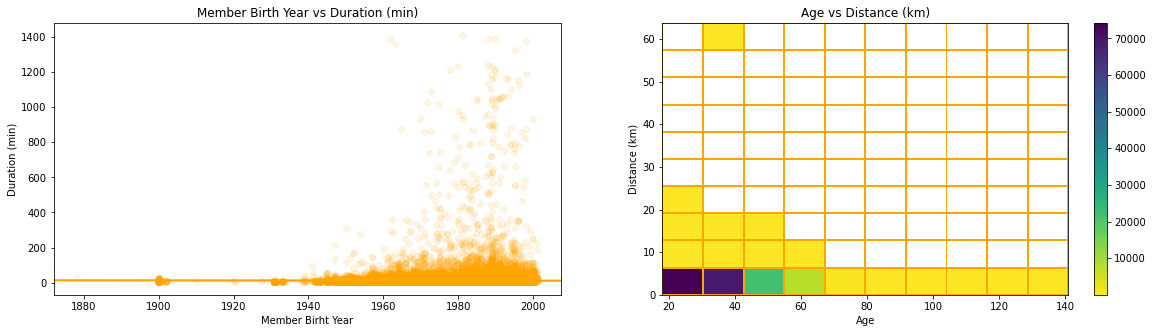

In [14]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

# Viewing the relationship between member_birth_year and duration of the rides (same with the above)
sb.regplot(data = bike_df, x = 'member_birth_year', y = 'duration_min', color = 'orange', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10})

# Labeling the axes and title 
plt.title('Member Birth Year vs Duration (min)')
plt.xlabel('Member Birht Year')
plt.ylabel('Duration (min)')


plt.subplot(1, 2, 2)

# Using cmap to reverse the color map.

plt.hist2d(data = bike_df, x = 'age', y = 'distance_km', color = 'orange', cmin=0.5, cmap='viridis_r')
plt.colorbar()

# Labeling the axes and title 
plt.title('Age vs Distance (km)')
plt.xlabel('Age')
plt.ylabel('Distance (km)');

**Observation:**

**Young riders ride more in duration and in distance**

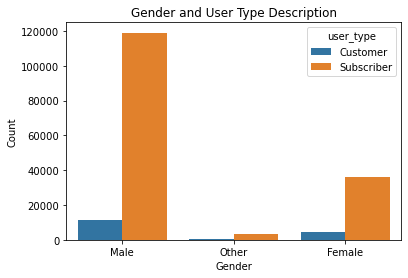

In [15]:
# Viewing gender and user type counts
sb.countplot(data = bike_df, x = 'member_gender', hue = 'user_type')

# Labeling the axes and title 
plt.title('Gender and User Type Description')
plt.xlabel('Gender')
plt.ylabel('Count');

**Observation:**

**Male subscriber riders are more than female subscribers.**

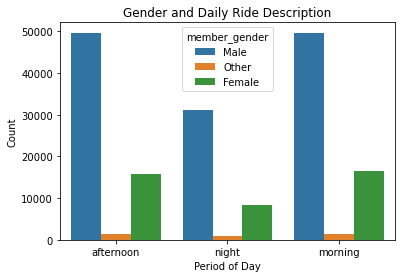

In [16]:
# Viewing rides during the day by each gender 
sb.countplot(data = bike_df, x = 'period_of_day', hue = 'member_gender')

# Labeling the axes and title 
plt.title('Gender and Daily Ride Description')
plt.xlabel('Period of Day')
plt.ylabel('Count');

**Observation:**

**Male riders ride more during the day than female ones.**

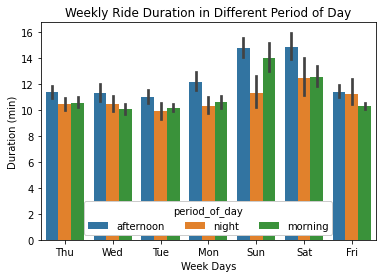

In [17]:
# Viewing ride duration during the week and period of day
ax = sb.barplot(data = bike_df, x = 'week_days', y = 'duration_min', hue = 'period_of_day')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'period_of_day')

# Labeling the axes and title 
plt.title('Weekly Ride Duration in Different Period of Day')
plt.xlabel('Week Days')
plt.ylabel('Duration (min)');

**Observation**

**During the weekends, afternoon ride duration average is the highest.**

<a id='call'></a>
### Call to Action



**Summary**

**Observation:**
    Rides are more during the morning than afternoon and night, rides are lower during the night
    
**Action:** 
    Making the available number of the bikes during the morning is crucial

**Observation:**
    Younger people rides longer distance than older ones
    
**Action:** 
    Target the Generation X in awareness and marketing 

**Observation:**
    Males are more prone to be subscriber than females
    Males ride more than females 
    
**Action:**
    Target the female riders in marketing to increase the number of the female subscribers
    
**Observation:**
    During the weekends, duration of the rides are the highest on afternoons, however, in general, rides during the weekends are the lowest
    
**Action:**
    Making the available number of the bikes during the afternoon